# Installing The Libraries

In [1]:
!pip install pytrends matplotlib pandas seaborn plotly

# Importing the Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup Pytrend Library and keyword define

In [39]:
pytrends = TrendReq(hl = 'en-Us',tz = '360')
keyword = "Data Science"

# Data Request

In [40]:
 pytrends.build_payload([keyword],cat = 0,timeframe = 'today 12-m',geo = '',gprop = '')

# Country wise Interest

In [41]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)

C:\Users\asus\AppData\Local\Temp\ipykernel_14452\742673171.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




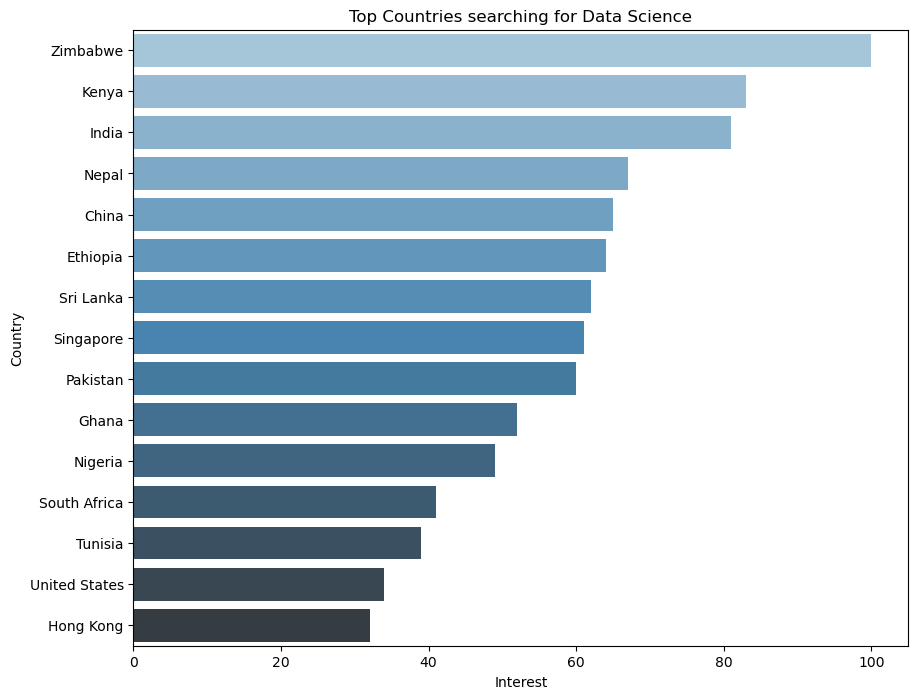

In [42]:
plt.figure(figsize= (10,8))
sns.barplot(x= region_data[keyword],y = region_data.index,palette = "Blues_d")
plt.title(f"Top Countries searching for {keyword}")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map for most searching Keyword

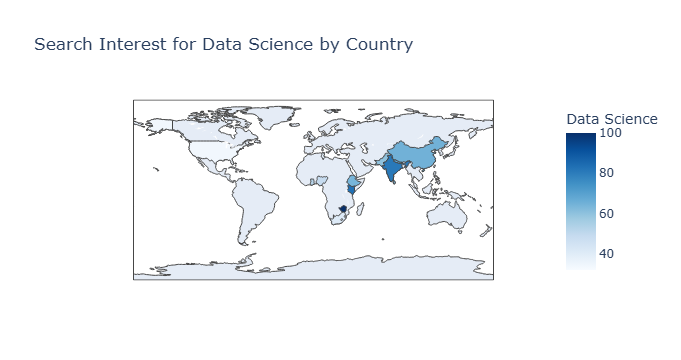

In [43]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations = 'geoName',
                    locationmode= 'country names',
                    color= keyword,
                    title = f"Search Interest for {keyword} by Country",
                    color_continuous_scale= 'Blues'
                   )
fig.show()

# Time Wise Interest

In [44]:
time_df = pytrends.interest_over_time()

C:\Users\asus\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



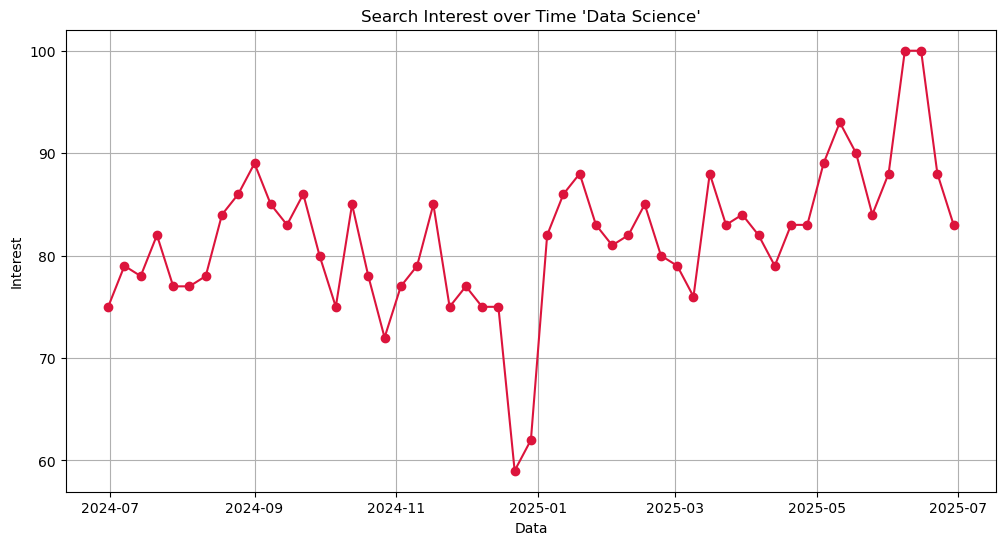

In [45]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker = 'o',color = 'crimson')
plt.title(f"Search Interest over Time '{keyword}'")
plt.xlabel("Data")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Mutltiple Keyword Compare

In [46]:
kw_list = ['Cloud Computing','Data Science','Data Analytics','Full Stack Developer','Block Chain Development']
pytrends.build_payload(kw_list,cat = 0, timeframe= 'today 12-m',geo ='',gprop = '')

C:\Users\asus\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



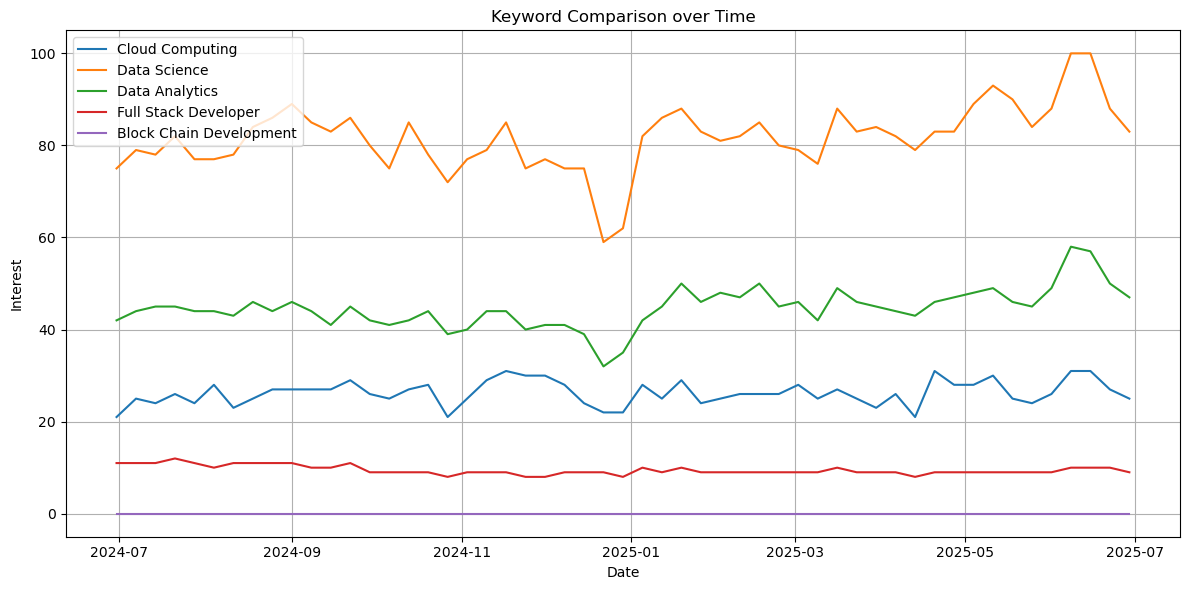

In [47]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize= (12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label = kw)
plt.title("Keyword Comparison over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()